# Customer data Analysis

### Problem Statement:

Customer data is when a company’s customers stop doing business with that company. Businesses are very keen on measuring data because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build data prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer data is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

### important liberary:

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### Reading dataset:

In [2]:
pd.set_option('display.max_columns',None)
data=pd.read_csv('cust.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### Checking shape of dataset using .shape

In [3]:
data.shape

(7043, 21)

The Rows and columns in dataframe is 7043 and 21 respetively.

##### Getting information about datatype and null values:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Calculting total sum of null values in dataset

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Observations:


1. There is no null value in the columns
2. Dataset has various types of data like int64,float64 as well as object.

In [6]:
colum_name =[]
unique_value=[]
for col in data:
    colum_name.append(str(col)) 
    unique_value.append(data[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table

,Col_name,Value
0,customerID,7043
19,TotalCharges,6531
18,MonthlyCharges,1585
5,tenure,73
17,PaymentMethod,4
11,DeviceProtection,3
15,Contract,3
14,StreamingMovies,3
13,StreamingTV,3
12,TechSupport,3


##### Dropping unneccasary column "customerID":

In [7]:
data=data.drop(columns=['customerID'])

##### Converting datatype of 'TotalCharges' column from object to float64:

In [8]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [9]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data visuallization:

#### For continuous data:

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='tenure'>

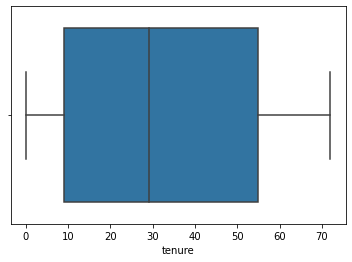

In [11]:
sns.boxplot(data['tenure'],orient='vericle')

<AxesSubplot:xlabel='MonthlyCharges'>

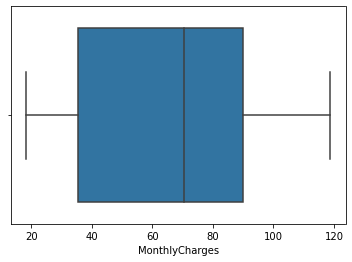

In [12]:
sns.boxplot(data['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges'>

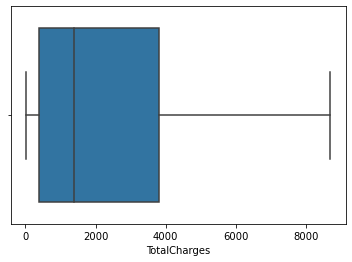

In [13]:
sns.boxplot(data['TotalCharges'])

### Observation:

There is no outlier in any of the continuous column as shown above.

<AxesSubplot:xlabel='tenure', ylabel='Density'>

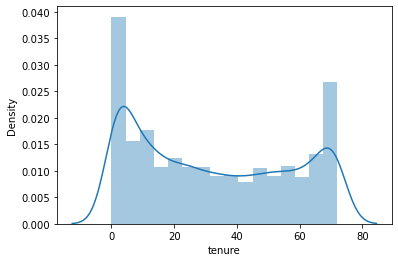

In [14]:
sns.distplot(data['tenure'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

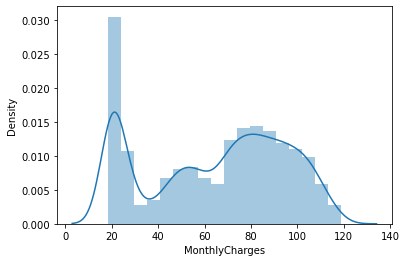

In [15]:
sns.distplot(data['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

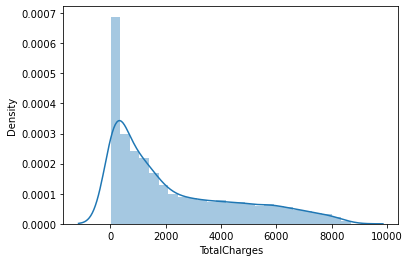

In [16]:
sns.distplot(data['TotalCharges'])

### observation :

The column Total charges has some skewness(Right side skewness).

#### Checking skewness in numerical value :

In [17]:
data.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

#### Checking Data imbalence in Independent feature:

<AxesSubplot:xlabel='Churn', ylabel='count'>

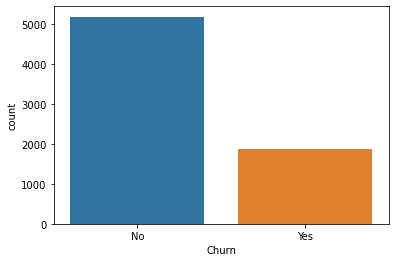

In [19]:
sns.countplot(data=data,x='data')

Churn column data is imbalenced. It need to be balanced.

#### Plotting countplot of available columns:

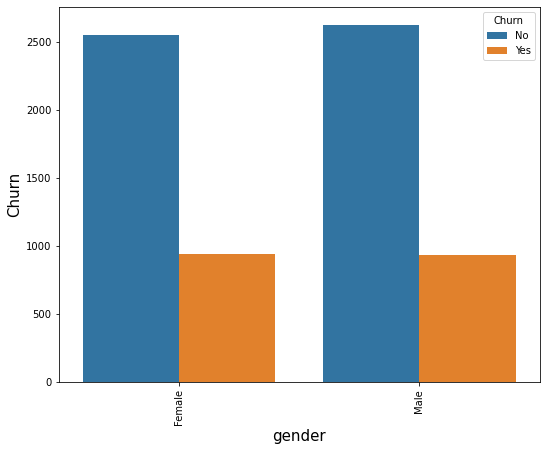

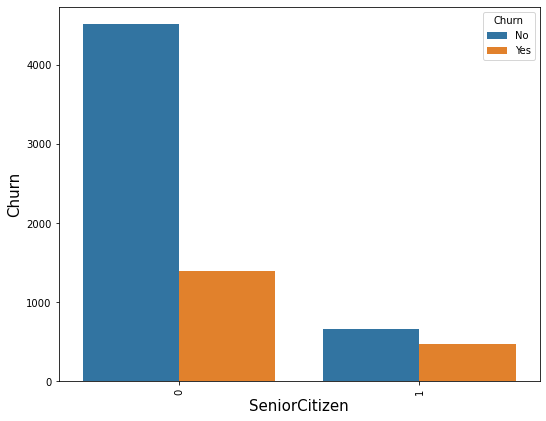

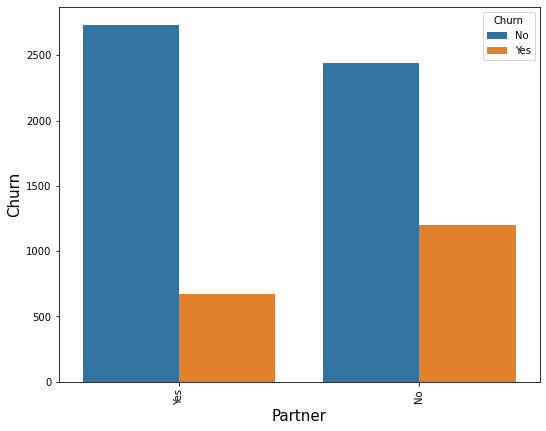

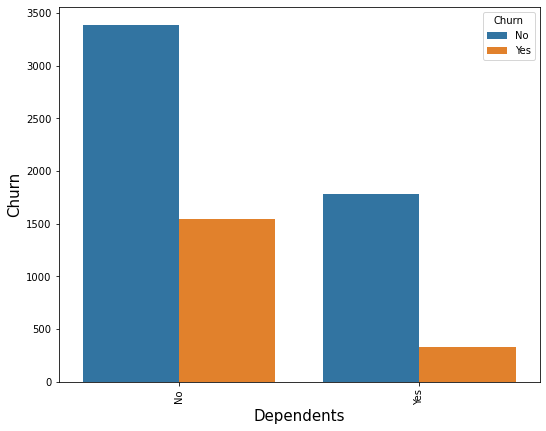

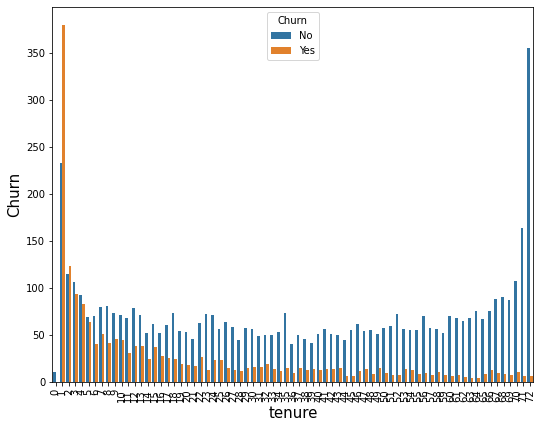

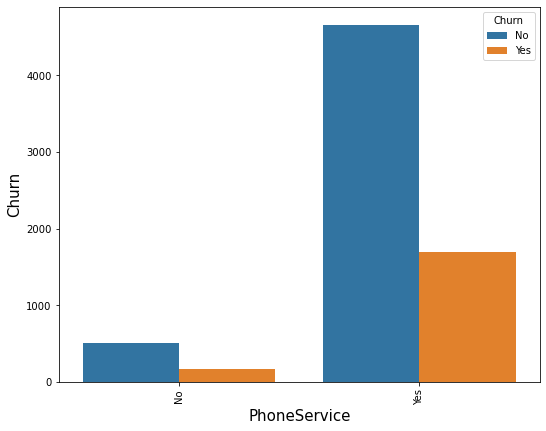

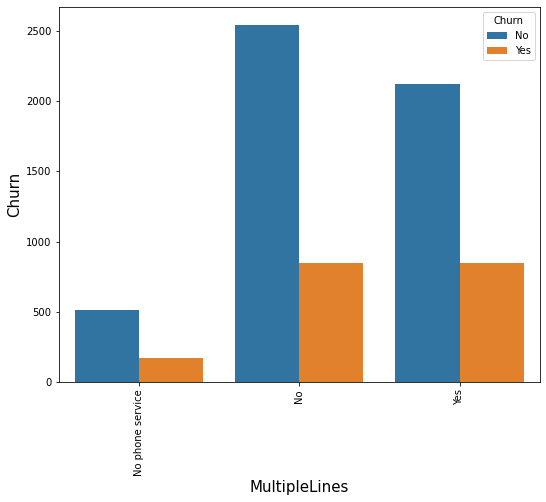

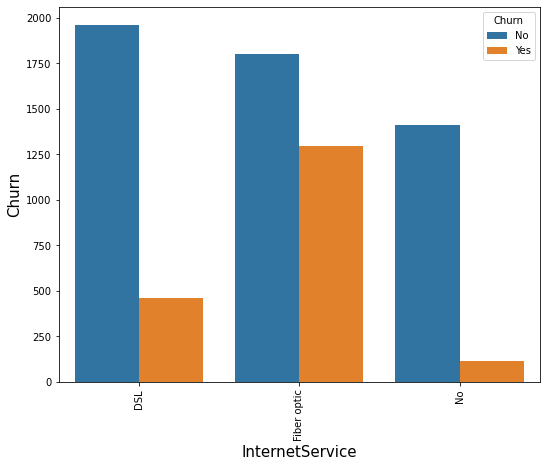

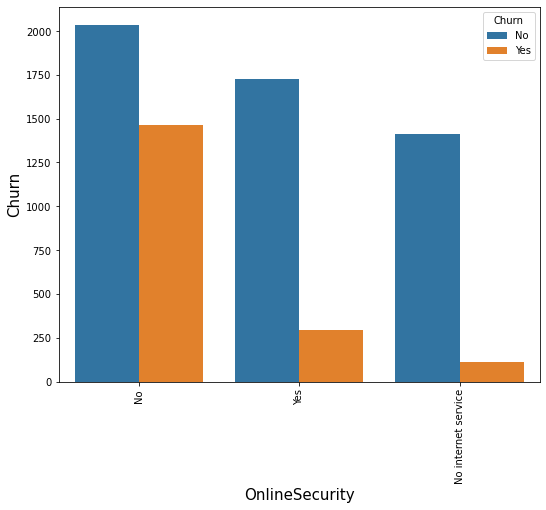

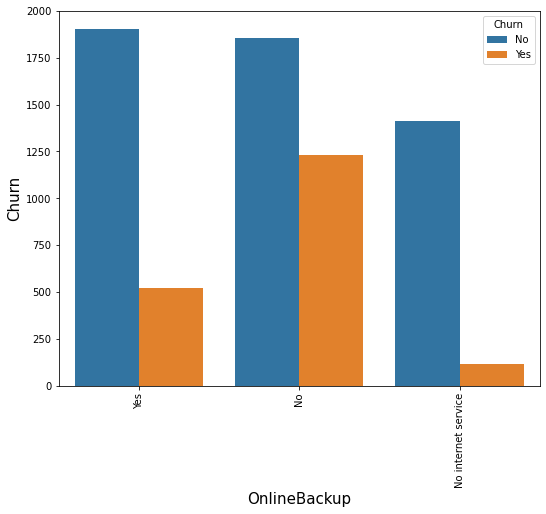

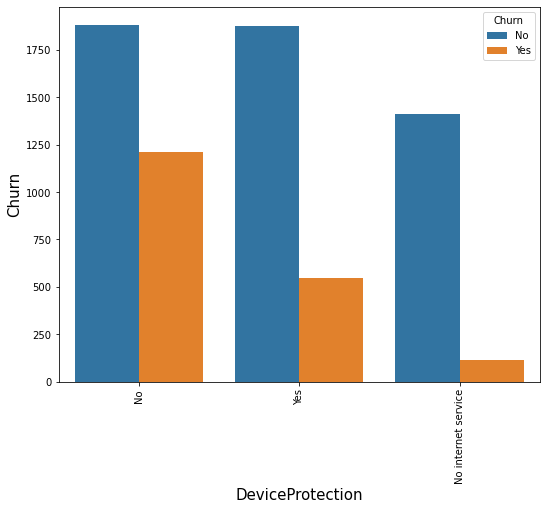

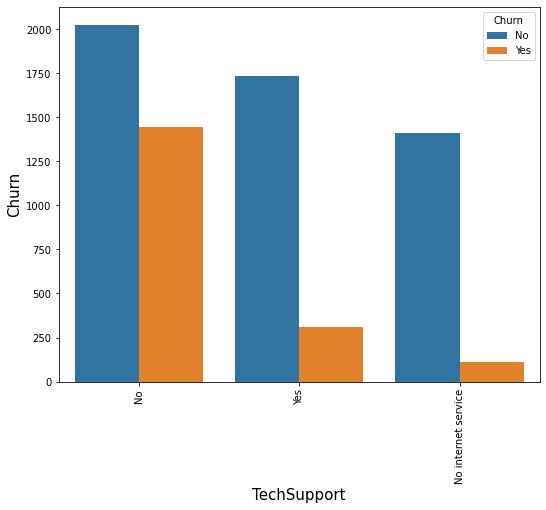

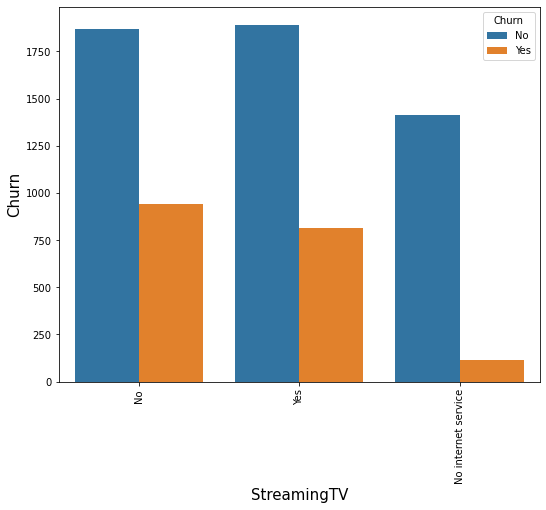

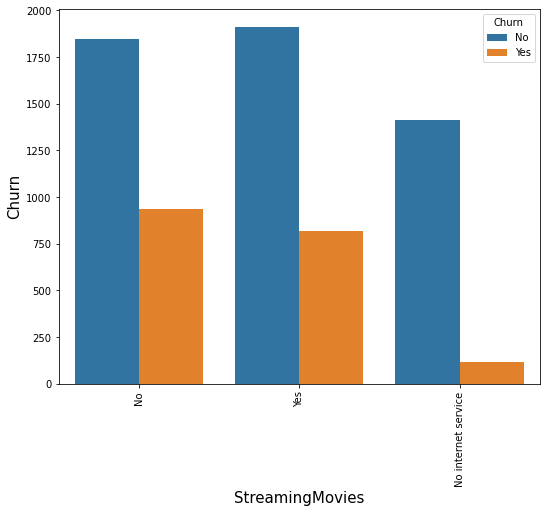

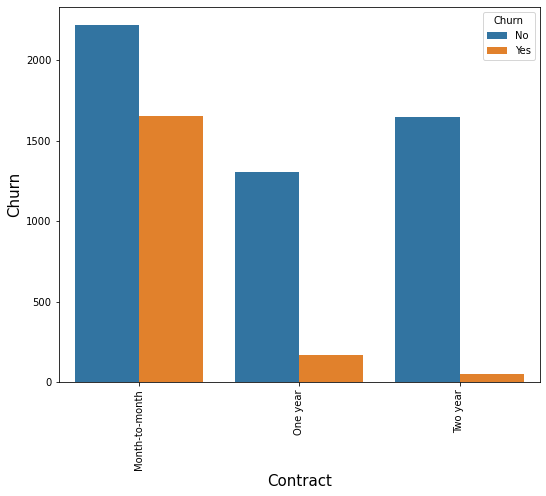

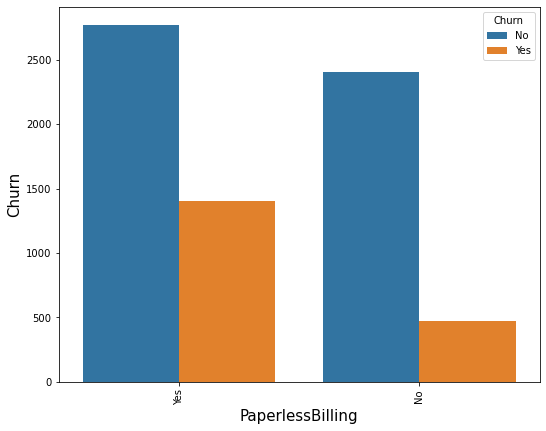

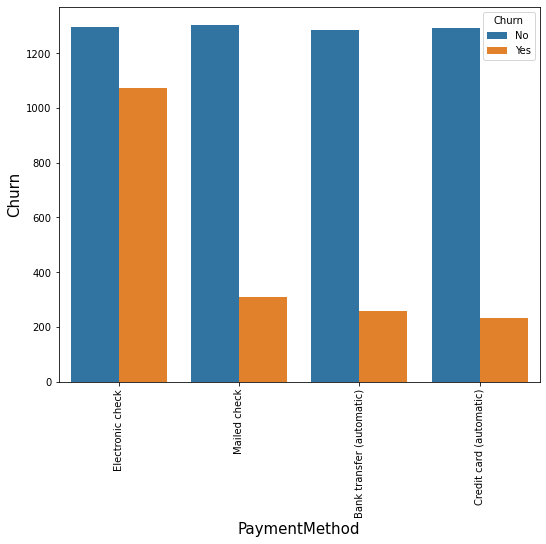

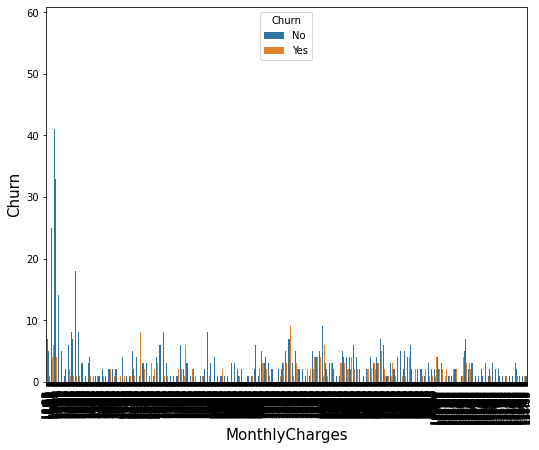

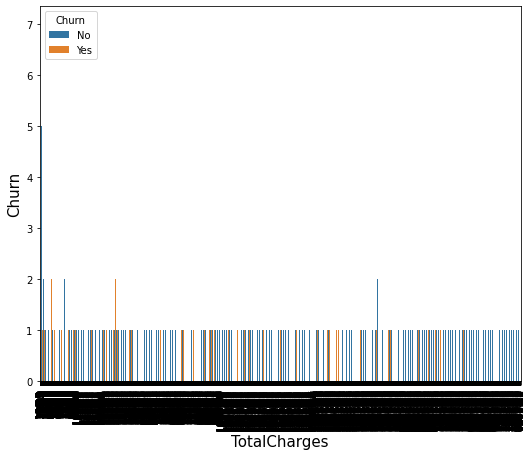

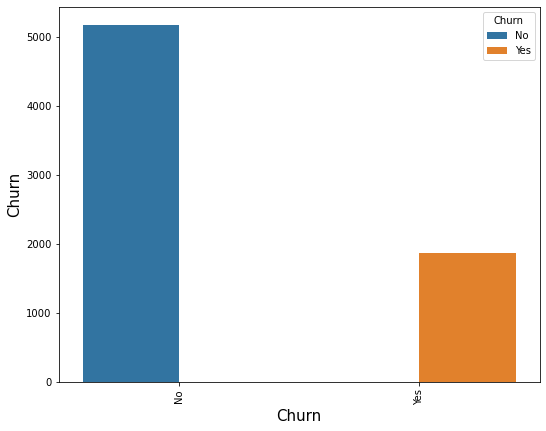

In [20]:
plotnumber=1
for i in data:
    if plotnumber<=50:
        plt.figure(figsize=(50,40))
        plt.subplot(5,5,plotnumber)
        sns.countplot(x=data[i],hue='data',data=data)
        plt.xlabel(i,fontsize=15)
        plt.xticks(rotation=90)
        plt.ylabel('data',fontsize=15)
    plotnumber+=1
plt.show()

#### Plotting stripplot of available data:

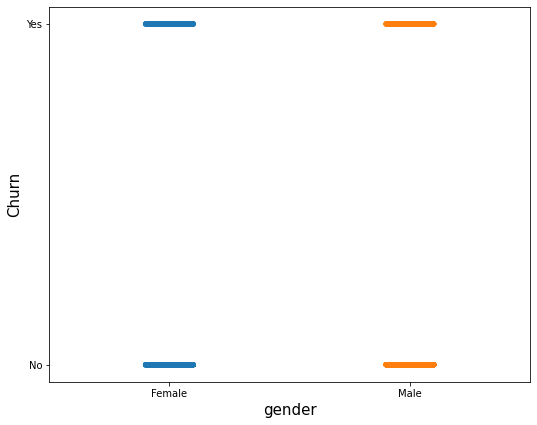

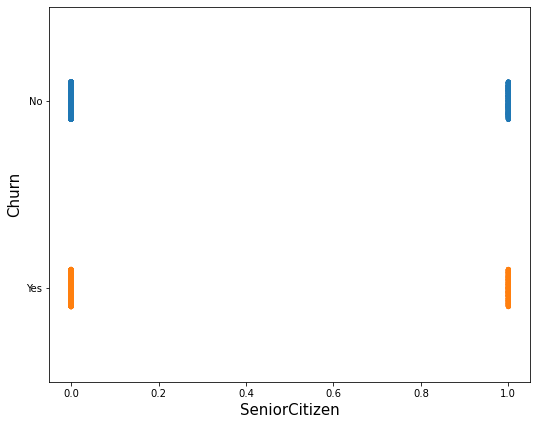

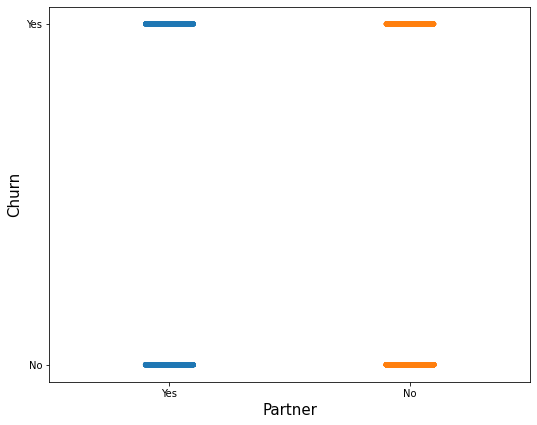

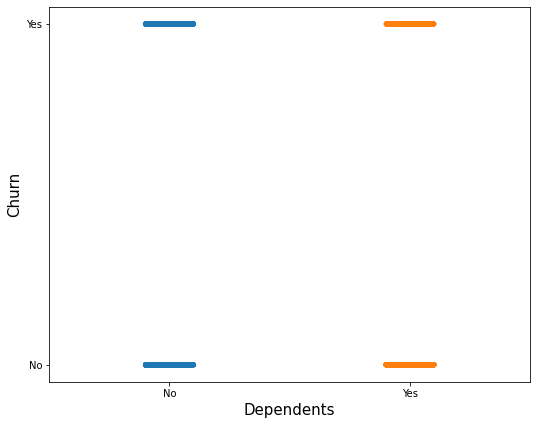

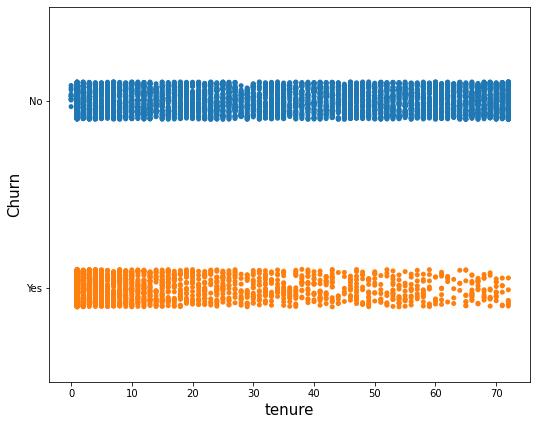

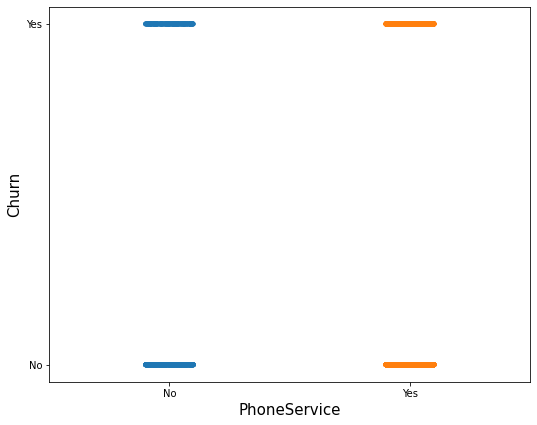

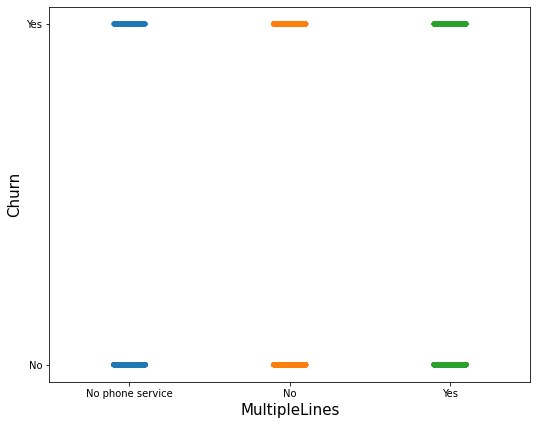

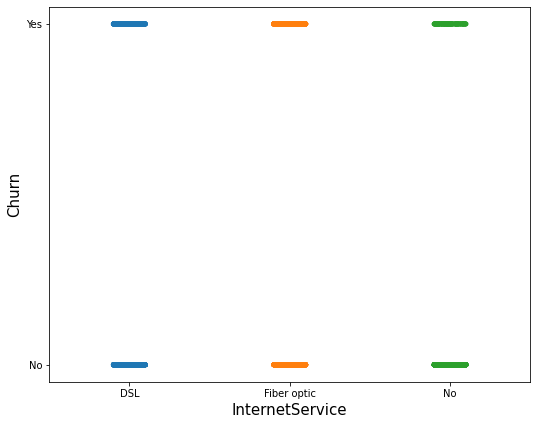

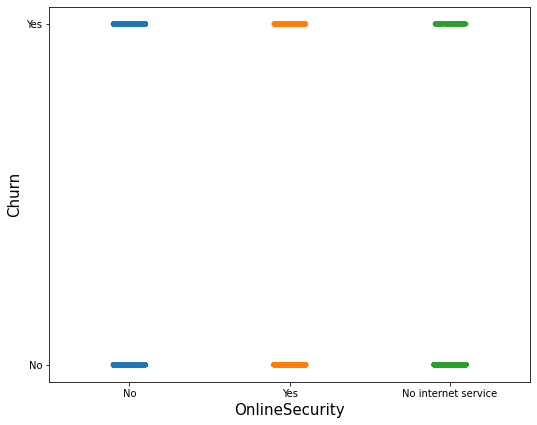

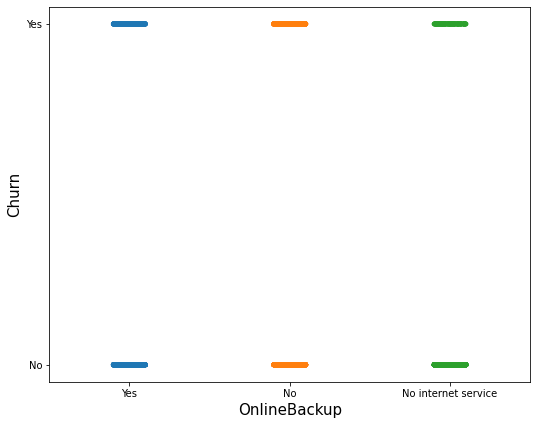

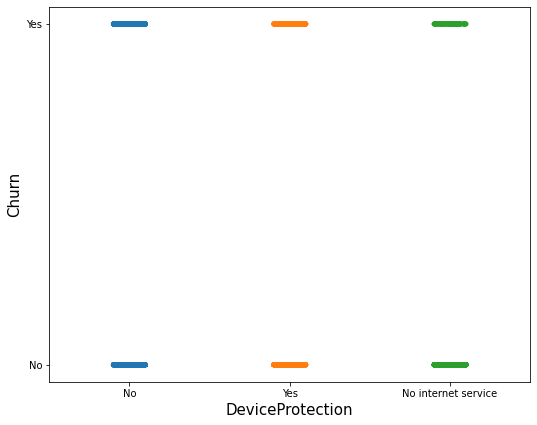

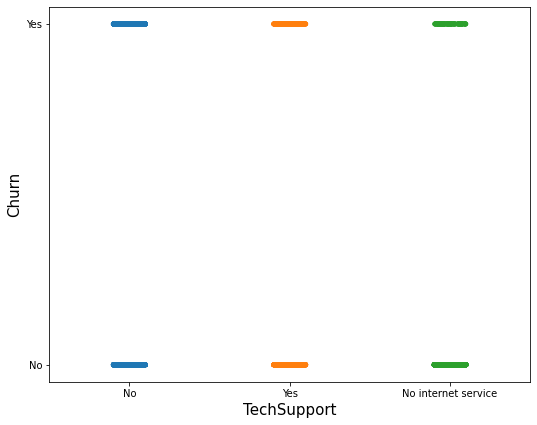

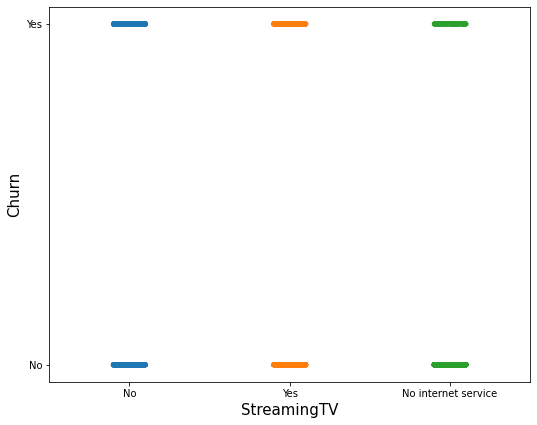

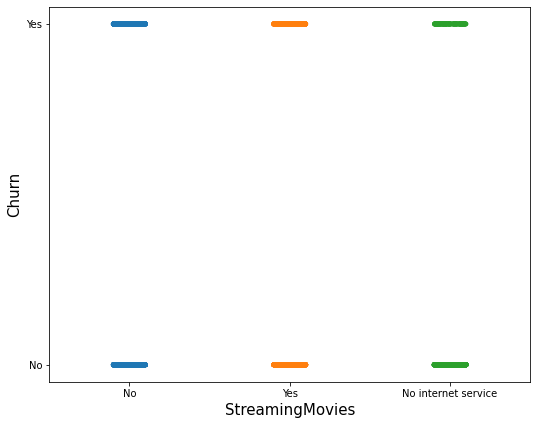

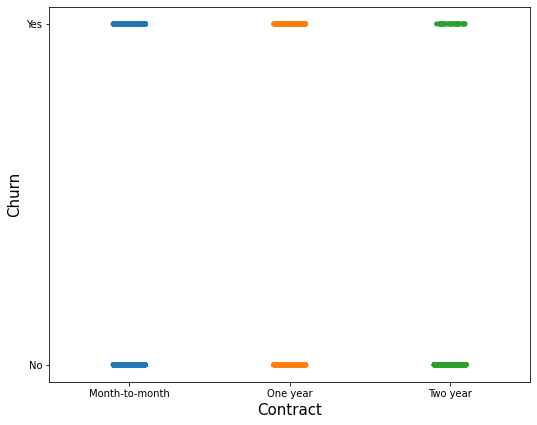

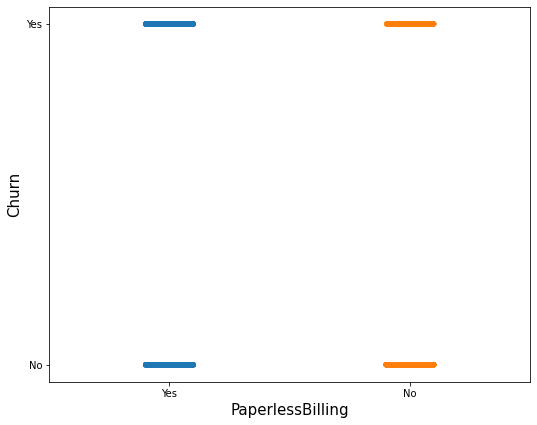

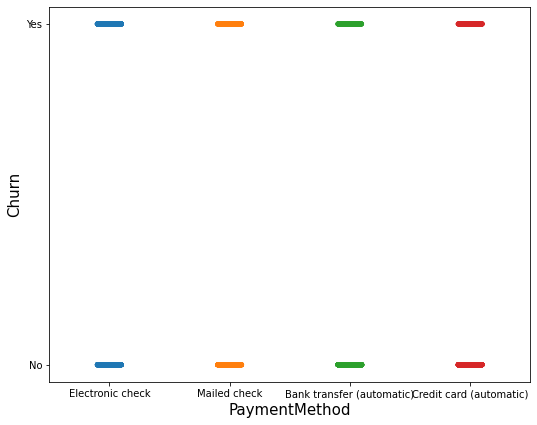

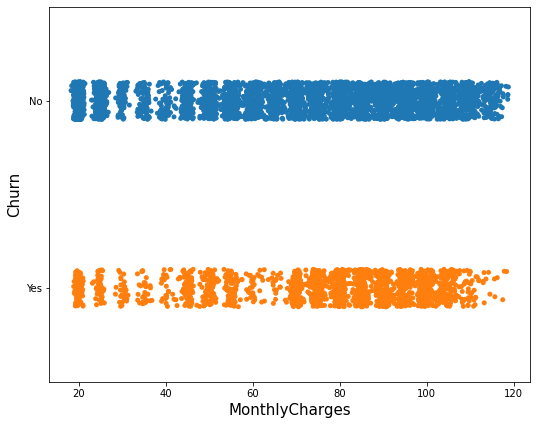

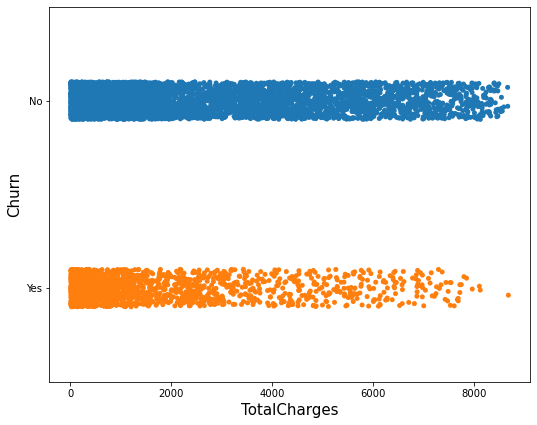

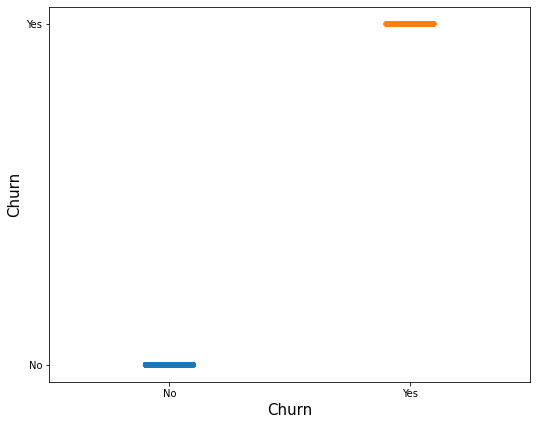

In [21]:
plotnumber=1
for i in data:
    if plotnumber<=50:
        plt.figure(figsize=(50,40))
        plt.subplot(5,5,plotnumber)
        sns.stripplot(x=data[i],y='data',data=data)
        plt.xlabel(i,fontsize=15)
        plt.ylabel('data',fontsize=15)
    plotnumber+=1
plt.show()

### LabelEncoding :

Applying LabelEncoding to the dataset 

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data=data.apply(le.fit_transform)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674,1


### Plottinging heatmap to check correlation:

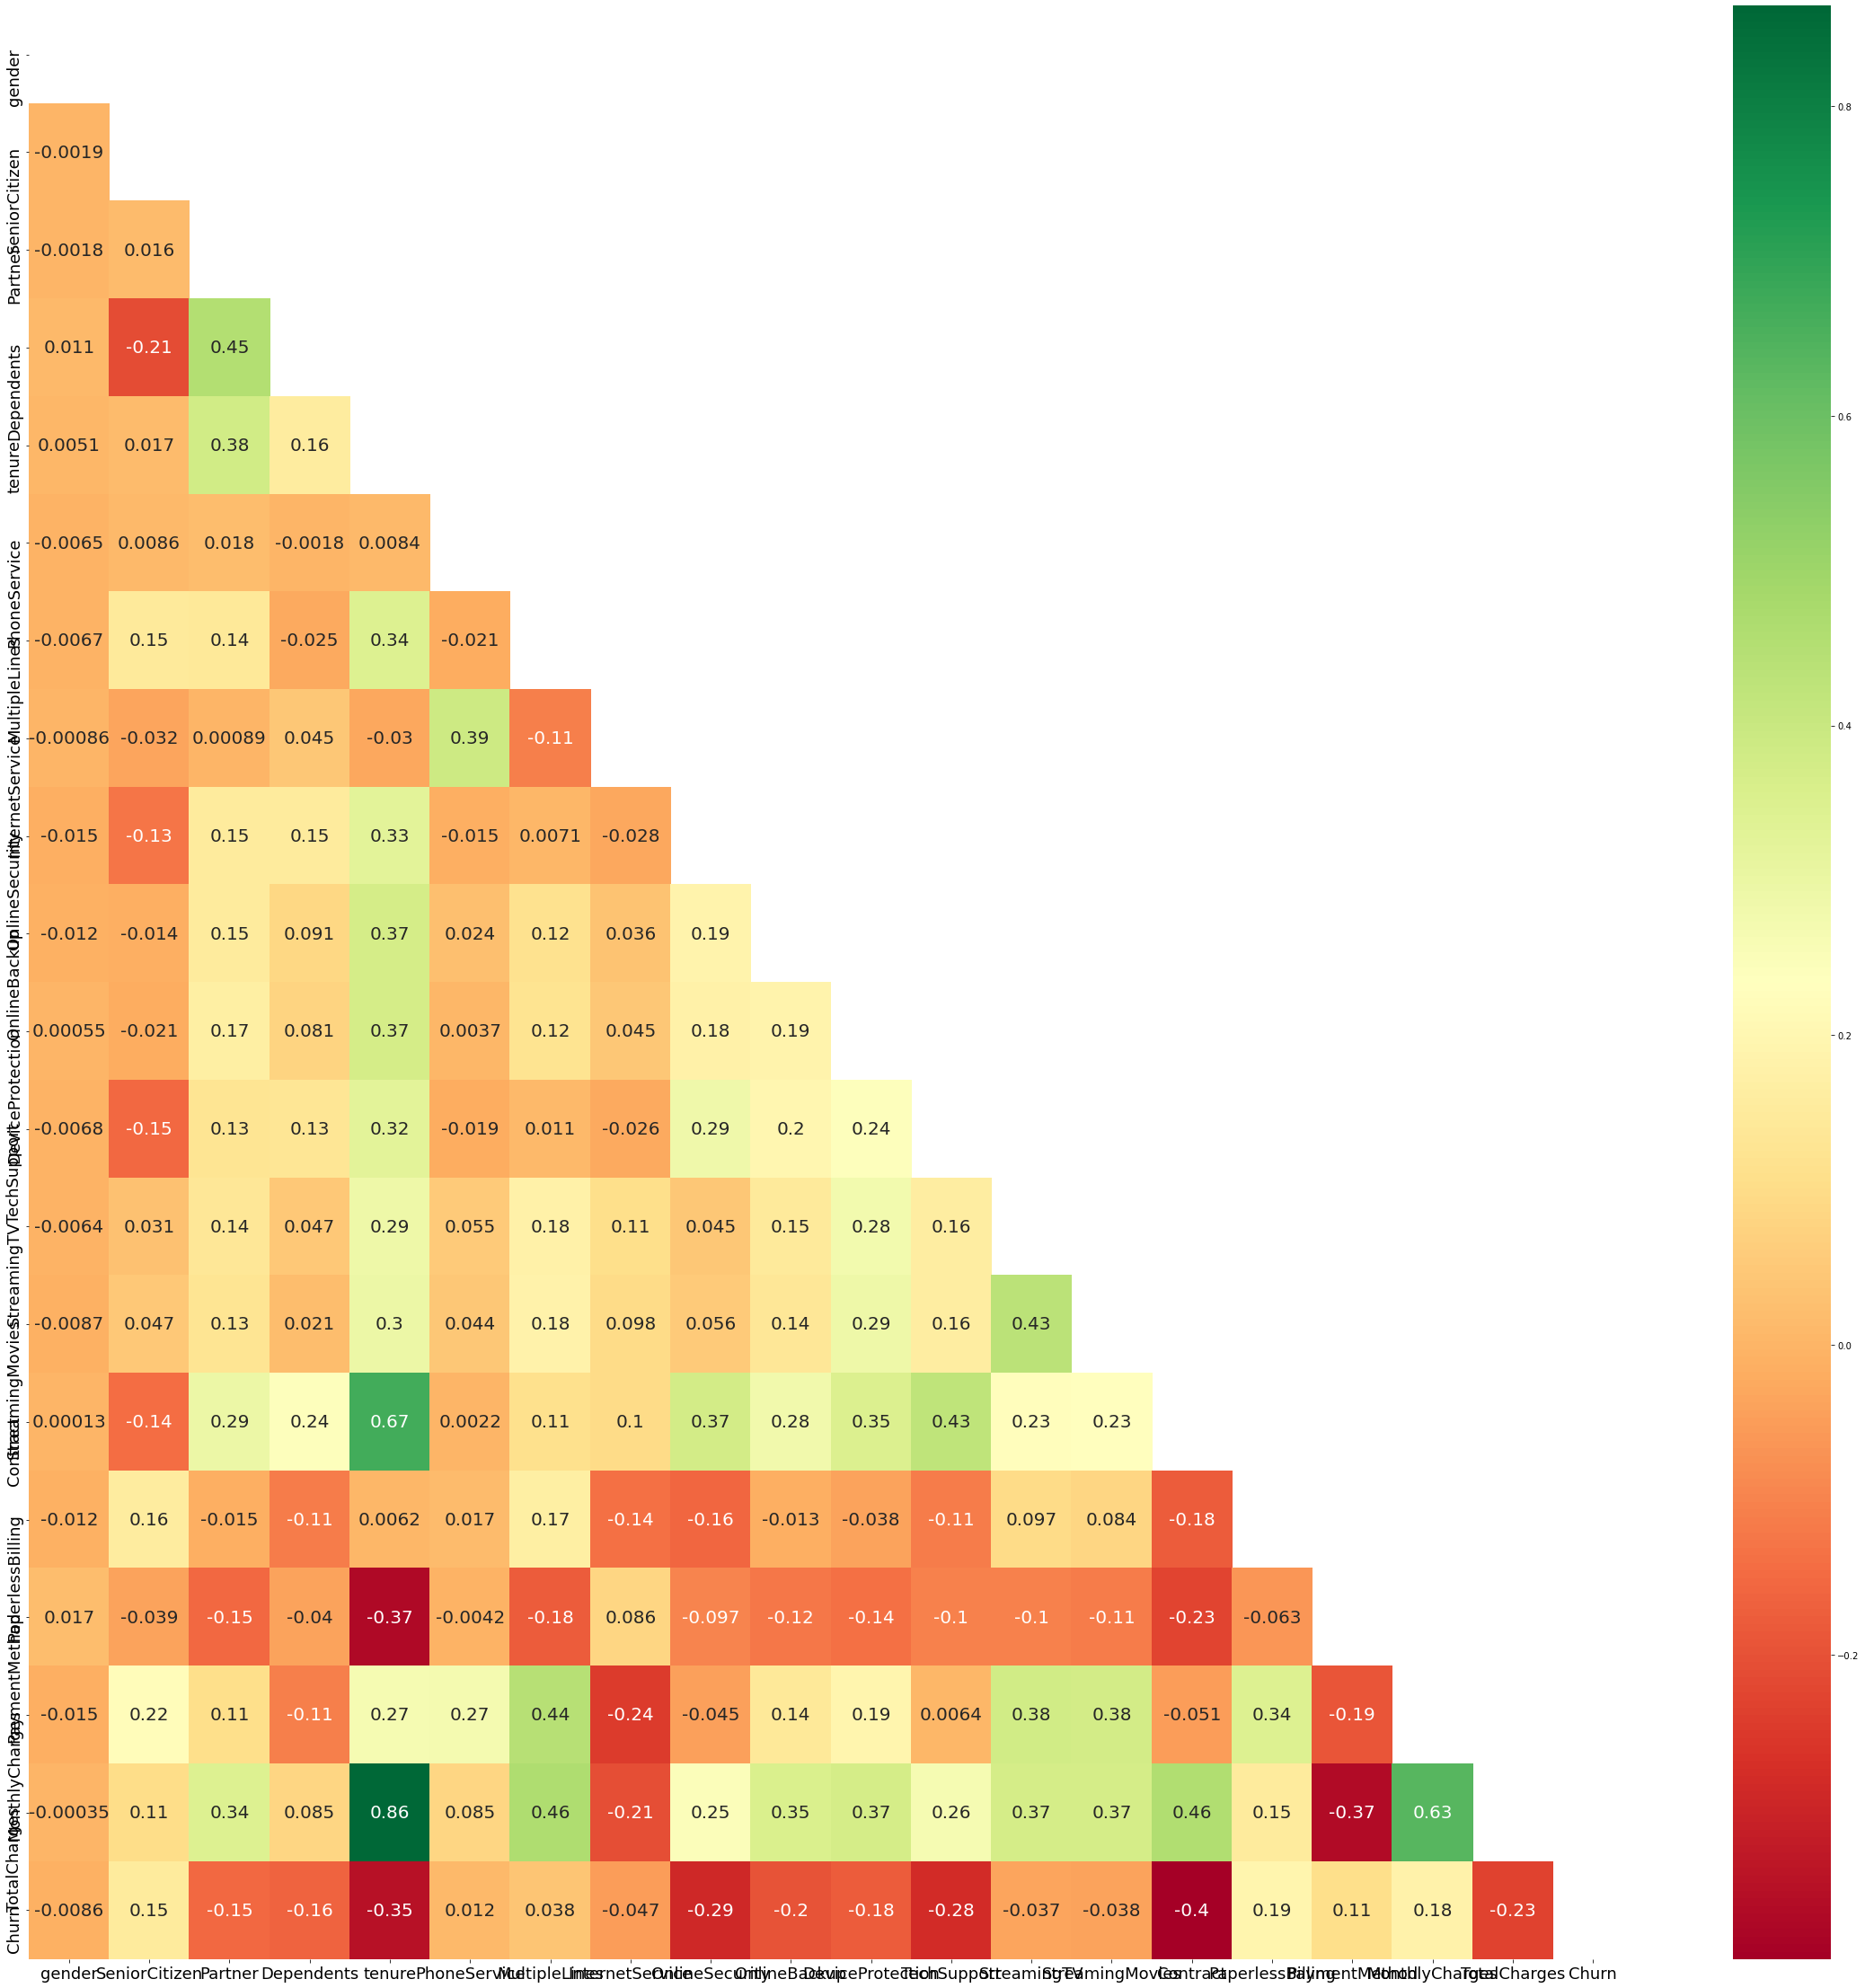

In [23]:
plt.figure(figsize=(40,40))
mask = np.triu(np.ones_like(data.corr()))
res = sns.heatmap(data.corr(), cmap='RdYlGn', annot=True,annot_kws={"size":20}, mask=mask)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)


plt.show()

#### Observation 

After studying heatmap, It is observed that there is no such correlation amoungst available columns

#### Seperating dependent and independent features :

In [24]:
x=data.drop('data',axis=1)
y=data['data']

#### Balancing dependent feature:

In [25]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over=sm.fit_resample(x,y)
print(y_over.value_counts())

0    5174
1    5174
Name: Churn, dtype: int64


### Model Deployment

In [26]:
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score

In [27]:
maxx=0
model=LogisticRegression()
for i in range(1,201):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.25,random_state=i)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxx:
        maxx=accu
        random_state_=i
print('\nmax random state:',random_state_)


max random state: 100


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.25,random_state=random_state_)

In [29]:
# LogisticRegression model  
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
scr_=cross_val_score(lr,x_over,y_over,cv=10)
print('--------------------------LogisticRegression------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------LogisticRegression------------------

accuracy score:80.60%

cross validation score:78.65%

auc roc score:80.61%


classification report:

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1301
           1       0.79      0.83      0.81      1286

    accuracy                           0.81      2587
   macro avg       0.81      0.81      0.81      2587
weighted avg       0.81      0.81      0.81      2587


confusioon matrix:

[[1013  288]
 [ 214 1072]]


In [30]:
# decisiontree classifier model  
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
scr_=cross_val_score(dtc,x_over,y_over,cv=10)
print('--------------------------Decision Tree Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------Decision Tree Classifier------------------

accuracy score:79.05%

cross validation score:79.74%

auc roc score:79.05%


classification report:

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1301
           1       0.78      0.80      0.79      1286

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587


confusioon matrix:

[[1020  281]
 [ 261 1025]]


In [31]:
# KNeighbors Classifier model
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
scr_=cross_val_score(knc,x_over,y_over,cv=10)
print('--------------------------KNeighbors Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------KNeighbors Classifier------------------

accuracy score:77.73%

cross validation score:78.17%

auc roc score:77.76%


classification report:

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1301
           1       0.75      0.82      0.79      1286

    accuracy                           0.78      2587
   macro avg       0.78      0.78      0.78      2587
weighted avg       0.78      0.78      0.78      2587


confusioon matrix:

[[ 954  347]
 [ 229 1057]]


In [32]:
# Support Vector Classifier model
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
scr_=cross_val_score(svc,x_over,y_over,cv=10)
print('--------------------------Support Vector Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------Support Vector Classifier------------------

accuracy score:73.83%

cross validation score:73.45%

auc roc score:73.83%


classification report:

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1301
           1       0.73      0.75      0.74      1286

    accuracy                           0.74      2587
   macro avg       0.74      0.74      0.74      2587
weighted avg       0.74      0.74      0.74      2587


confusioon matrix:

[[951 350]
 [327 959]]


In [33]:
# GaussianNB Classifier model
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
scr_=cross_val_score(gnb,x_over,y_over,cv=10)
print('--------------------------AdaBoost Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------AdaBoost Classifier------------------

accuracy score:78.43%

cross validation score:77.81%

auc roc score:78.46%


classification report:

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1301
           1       0.75      0.84      0.79      1286

    accuracy                           0.78      2587
   macro avg       0.79      0.78      0.78      2587
weighted avg       0.79      0.78      0.78      2587


confusioon matrix:

[[ 949  352]
 [ 206 1080]]


In [34]:
# RandomForest Classifier model
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
scr_=cross_val_score(rfc,x_over,y_over,cv=10)
print('--------------------------RandomForest Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------RandomForest Classifier------------------

accuracy score:84.92%

cross validation score:85.06%

auc roc score:84.93%


classification report:

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1301
           1       0.85      0.85      0.85      1286

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587


confusioon matrix:

[[1102  199]
 [ 191 1095]]


In [35]:
# AdaBoost Classifier model
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
pred=abc.predict(x_test)
scr_=cross_val_score(abc,x_over,y_over,cv=10)
print('--------------------------AdaBoost Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------AdaBoost Classifier------------------

accuracy score:82.68%

cross validation score:81.45%

auc roc score:82.70%


classification report:

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1301
           1       0.80      0.86      0.83      1286

    accuracy                           0.83      2587
   macro avg       0.83      0.83      0.83      2587
weighted avg       0.83      0.83      0.83      2587


confusioon matrix:

[[1033  268]
 [ 180 1106]]


In [36]:
# XGB Classifier model
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)
scr_=cross_val_score(xgb,x_over,y_over,cv=10)
print('--------------------------AdaBoost Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------AdaBoost Classifier------------------

accuracy score:85.39%

cross validation score:84.23%

auc roc score:85.39%


classification report:

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1301
           1       0.85      0.85      0.85      1286

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587


confusioon matrix:

[[1115  186]
 [ 192 1094]]


In [37]:
# GradientBoosting Classifier model
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
scr_=cross_val_score(gbc,x_over,y_over,cv=10)
print('--------------------------AdaBoost Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------AdaBoost Classifier------------------

accuracy score:84.38%

cross validation score:82.58%

auc roc score:84.40%


classification report:

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1301
           1       0.82      0.87      0.85      1286

    accuracy                           0.84      2587
   macro avg       0.85      0.84      0.84      2587
weighted avg       0.85      0.84      0.84      2587


confusioon matrix:

[[1060  241]
 [ 163 1123]]


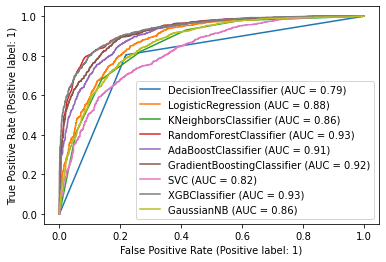

In [38]:
disp=plot_roc_curve(dtc,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_) # ax_ = axes with confusion matrix , use to combine one model to others
plot_roc_curve(knc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(abc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gnb,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [39]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

#### GridSearch CV:

In [40]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth': [7,10,15,20],'splitter': ['best','random'],'criterion': ['gini', 'entropy']}
clf=GridSearchCV(dtc,parameters)
clf.fit(x_train,y_train)
print('best parameters',clf.best_params_)

dtc_new=clf.best_estimator_
dtc_new.fit(x_train,y_train)
pred=dtc_new.predict(x_test)
scr_=cross_val_score(dtc_new,x_over,y_over,cv=10)
print('-------------------------- DecissionTree Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

best parameters {'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}
-------------------------- DecissionTree Classifier------------------

accuracy score:81.72%

cross validation score:80.41%

auc roc score:81.74%


classification report:

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1301
           1       0.79      0.86      0.82      1286

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587


confusioon matrix:

[[1002  299]
 [ 174 1112]]


#### AUC_ROC curve :

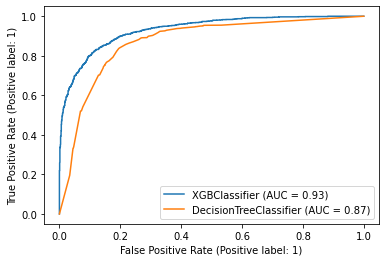

In [41]:
disp=plot_roc_curve(xgb,x_test,y_test)
plot_roc_curve(dtc_new,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

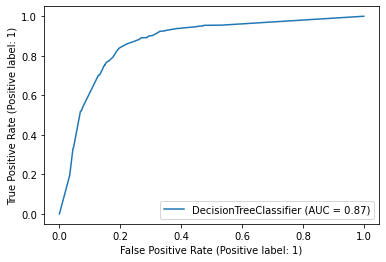

In [42]:
disp=plot_roc_curve(dtc_new,x_test,y_test)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

### Saving Model:

In [43]:
import pickle
filename='customer_data_final.pkl'
pickle.dump(dtc_new,open(filename,'wb'))